In [48]:
# try:
#   # This command only in Colab.
#   %tensorflow_version 2.x
# except Exception:
#   pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# # Get project files
# !wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

# !unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

# Code doesn't work since we can't access the site from python
# import wget
# import zipfile

# url = "https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip"
# filename = wget.download(url)
# with zipfile.ZipFile(filename, "r") as zip_ref:
#     zip_ref.extractall(PATH)

PATH = os.path.join(os.getcwd(), PATH)

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')
# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))
# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [77]:
# 3
train_image_generator = ImageDataGenerator(rescale=1/255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1/255) 
test_image_generator = ImageDataGenerator(rescale=1/255) 

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary'
                                                           )
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              shuffle=True,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary'
                                                              )
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory=os.path.dirname(test_dir),
                                                         shuffle=False,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         classes=['test'],
                                                         )
print(train_data_gen.class_indices)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.
{'cats': 0, 'dogs': 1}


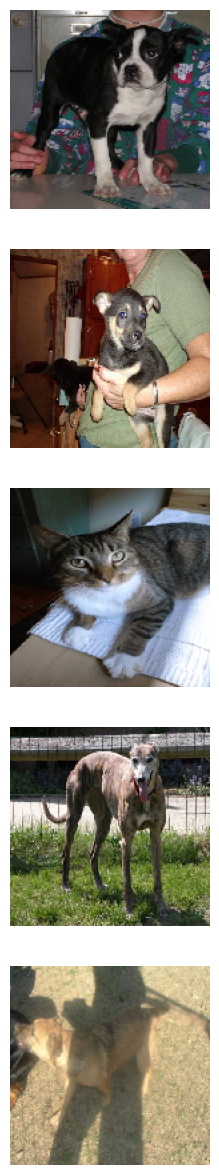

In [69]:
# 4
import PIL.Image
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [70]:
# 5
train_image_generator = ImageDataGenerator(rescale=1/255,
                                           rotation_range=45,
                                           width_shift_range=.15,
                                           height_shift_range=.15,
                                           horizontal_flip=True,
                                           zoom_range=0.5,
                                           brightness_range=[0.4,1.5],) # Generator for our training data


Found 2000 images belonging to 2 classes.


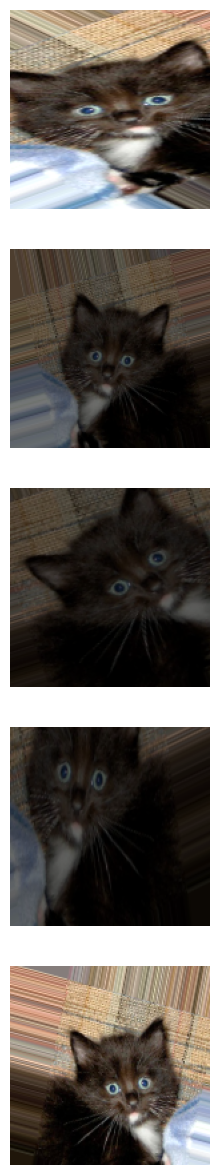

In [71]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [91]:
# 7
filter_count = 32
kernal_size = 3
pooling_size = 2
dropout_rate = 0.25
dense_layer_size = 512
model = Sequential([
    # Conv2D(filter_count, (kernal_size,kernal_size), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3), padding="Valid"),
    # MaxPooling2D(pooling_size,pooling_size),
    Conv2D(filter_count, (kernal_size,kernal_size), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3), padding="Valid"),
    MaxPooling2D(pooling_size,pooling_size),
    Conv2D(filter_count, (kernal_size,kernal_size), activation='relu', padding="Valid"),
    MaxPooling2D(pooling_size,pooling_size),
    Conv2D(filter_count, (kernal_size,kernal_size), activation='relu', padding="Valid"),
    MaxPooling2D(pooling_size,pooling_size),
    Dropout(dropout_rate),
    Flatten(),  
    Dense(dense_layer_size, activation='relu'),
    Dense(1, activation='sigmoid'), # Creating a binary classifier
]
)   

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 34, 34, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 512)            │     4,735,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,755,393 (18.14 MB)

 Trainable params: 4,755,393 (18.14 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
# 8
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4996 - loss: 1.0576 - val_accuracy: 0.4888 - val_loss: 0.6932
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.4688 - loss: 0.6927 - val_accuracy: 0.5112 - val_loss: 0.6929
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 917ms/step - accuracy: 0.5222 - loss: 0.6911 - val_accuracy: 0.5089 - val_loss: 0.6926
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.5500 - loss: 0.6816 - val_accuracy: 0.5056 - val_loss: 0.6971
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 899ms/step - accuracy: 0.5516 - loss: 0.6885 - val_accuracy: 0.6105 - val_loss: 0.6801
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.6875 - loss: 0.6708 - val_accuracy: 0.6306 - val_loss: 0.6784
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 947ms/step - accuracy: 0.6408 - loss: 0.6564 - val_accuracy: 0.6585 - val_loss: 0.6349
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.6719 - loss: 0.6306 - val_accuracy: 0

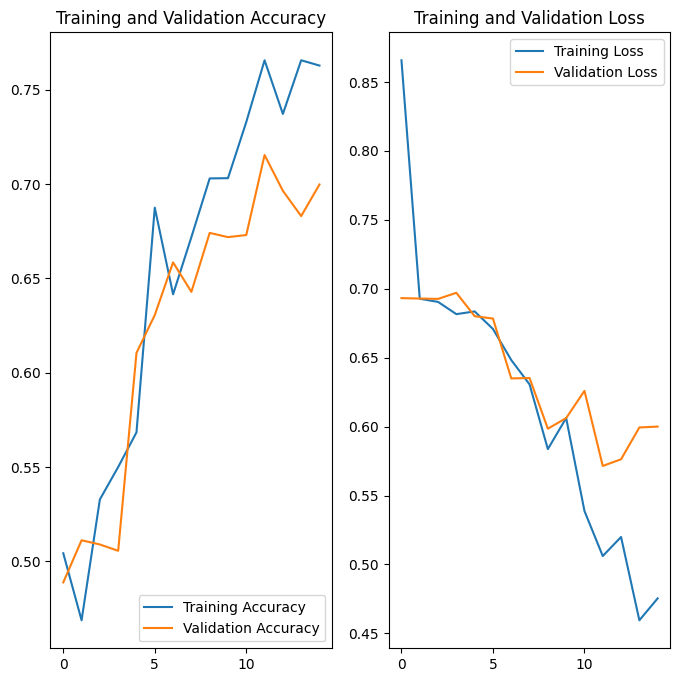

In [96]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


C:\Users\toopr\AppData\Local\Temp\ipykernel_28336\1390995364.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title("%.2f" % (probability*100) + "% dog")
C:\Users\toopr\AppData\Local\Temp\ipykernel_28336\1390995364.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title("%.2f" % ((1-probability)*100) + "% cat")


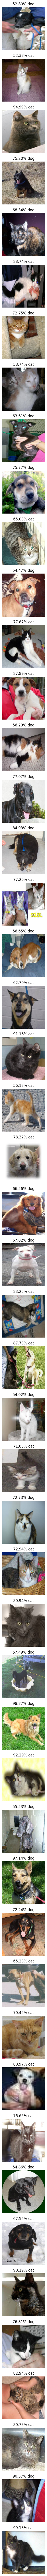

In [97]:
# 10
probabilities = model.predict(test_data_gen)
plotImages(test_data_gen[0][0], probabilities)

In [100]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if np.rint(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!
